<a href="https://colab.research.google.com/github/Shaon2710/COVID_19/blob/master/COVID_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pyplot import rcParams
rcParams['figure.figsize'] = 16,9

In [ ]:
dataset = pd.read_csv("data.csv")
#DayTime Convert from String formate
dataset['date'] = pd.to_datetime(dataset['date'], infer_datetime_format=False)
indexeDataset = dataset.set_index(['date'])

In [ ]:
#Sample Show Data 
from datetime import datetime
indexeDataset.head(10)

,new_cases
date,
2020-03-17,2
2020-03-18,3
2020-03-19,2
2020-03-21,7
2020-03-22,7
2020-03-23,3
2020-03-24,6
2020-03-25,6
2020-03-27,9


In [ ]:
#Sample Show Data 
from datetime import datetime
indexeDataset.tail(10)

,new_cases
date,
2020-07-09,3489
2020-07-10,3360
2020-07-11,2949
2020-07-12,2686
2020-07-13,2666
2020-07-14,3099
2020-07-15,3163
2020-07-16,3533
2020-07-17,2733


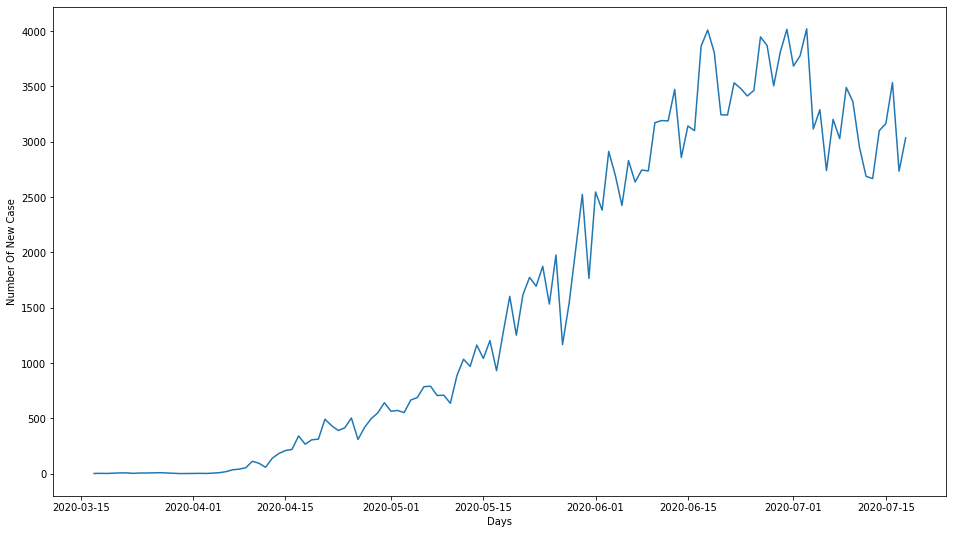

In [ ]:
#Sample Graph
plt.xlabel("Days")
plt.ylabel("Number Of New Case")
plt.plot(indexeDataset)

In [ ]:
#Rolling Statistics


rolmean = indexeDataset.rolling(window=12).mean()
rolstd = indexeDataset.rolling(window=12).std()

print(rolmean, rolstd)

              new_cases
date                   
2020-03-17          NaN
2020-03-18          NaN
2020-03-19          NaN
2020-03-21          NaN
2020-03-22          NaN
...                 ...
2020-07-14  3136.333333
2020-07-15  3065.000000
2020-07-16  3099.916667
2020-07-17  3053.666667
2020-07-18  3078.333333

[119 rows x 1 columns]              new_cases
date                  
2020-03-17         NaN
2020-03-18         NaN
2020-03-19         NaN
2020-03-21         NaN
2020-03-22         NaN
...                ...
2020-07-14  382.849207
2020-07-15  265.065687
2020-07-16  297.695836
2020-07-17  308.726809
2020-07-18  292.617446

[119 rows x 1 columns]


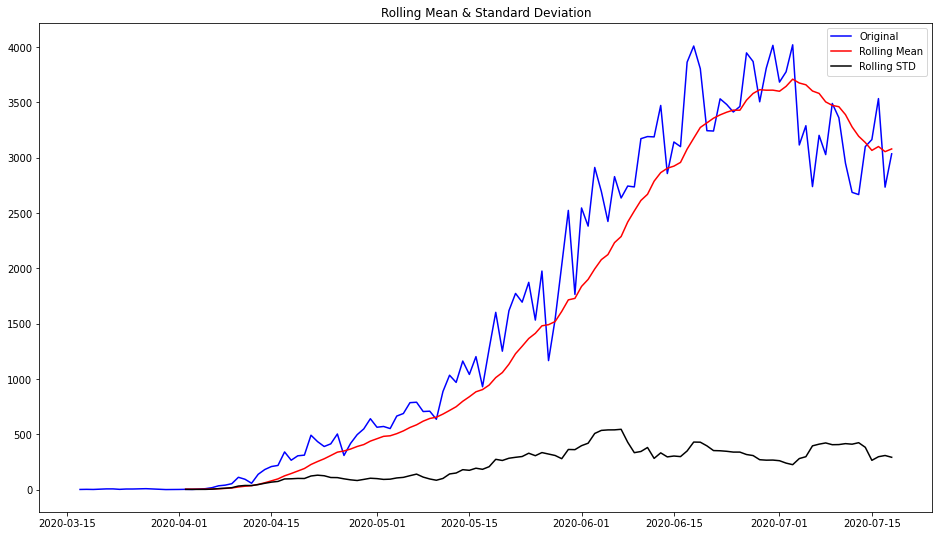

In [ ]:
#Plot Rolling Statistics

orig = plt.plot(indexeDataset, color='blue', label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label='Rolling STD')

plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [ ]:
#Dickey Fuller Test

from statsmodels.tsa.stattools import adfuller

print("Result of Dickey_Fuller Test: ")
dftest = adfuller(indexeDataset['new_cases'], autolag='AIC')

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value','#Lags Uses', 'Number Of Ob'])
for key,value in dftest[4].items():
  dfoutput['Critical Value (%s)'%key] = value

print(dfoutput)
 

Result of Dickey_Fuller Test: 
Test Statistic           -0.783873
p-value                   0.823814
#Lags Uses                3.000000
Number Of Ob            115.000000
Critical Value (1%)      -3.488535
Critical Value (5%)      -2.887020
Critical Value (10%)     -2.580360
dtype: float64


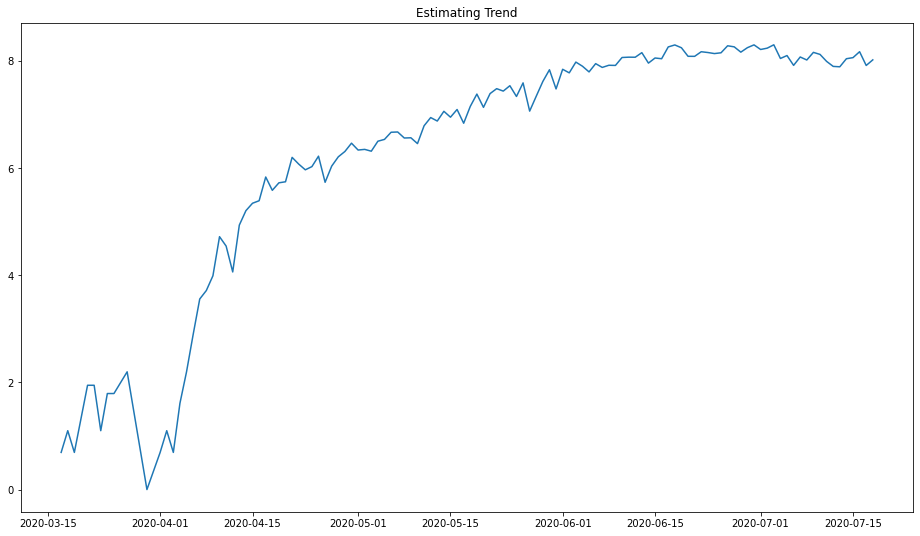

In [ ]:
#Estimating Trend
indexeDataset_logScale = np.log(indexeDataset)
plt.title('Estimating Trend')
plt.plot(indexeDataset_logScale)

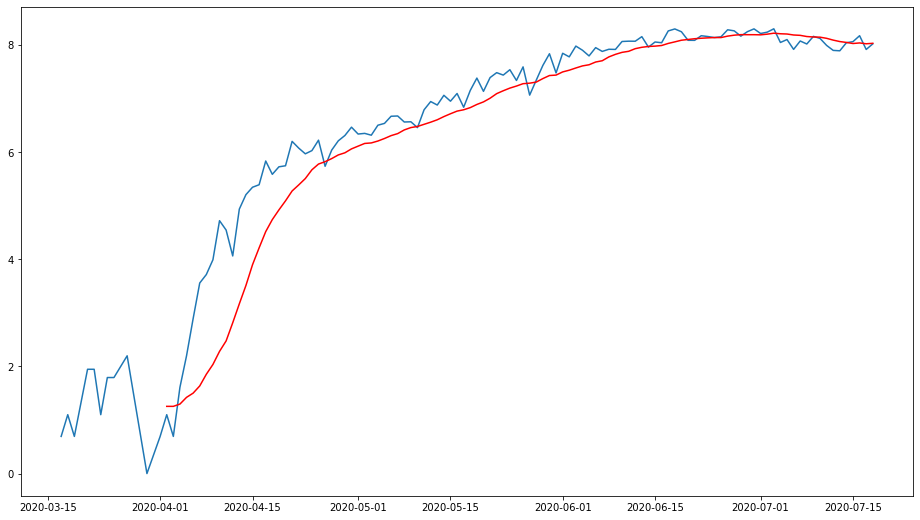

In [ ]:
movingAvg = indexeDataset_logScale.rolling(window=12).mean()
movingSTD = indexeDataset_logScale.rolling(window=12).std()

plt.plot(indexeDataset_logScale)
plt.plot(movingAvg, color='red')


In [ ]:
datasetLogScaleMinusMovingAgv = indexeDataset_logScale - movingAvg
datasetLogScaleMinusMovingAgv.head(12)

#Remove NaN value

datasetLogScaleMinusMovingAgv.dropna(inplace = True)
datasetLogScaleMinusMovingAgv.head(10)

,new_cases
date,
2020-04-02,-0.155375
2020-04-03,-0.560840
2020-04-04,0.312882
2020-04-05,0.775329
2020-04-06,1.389771
2020-04-07,1.920628
2020-04-08,1.860938
2020-04-09,1.953248
2020-04-10,2.438868


In [ ]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):

  #Determine Rolling Statistics
  mAvg = timeseries.rolling(window=12).mean()
  mSTD = timeseries.rolling(window=12).std()

  #Ploting Roling Statistics
  orig = plt.plot(timeseries, color='blue', label='Original')
  mean = plt.plot(mAvg, color='red', label='Rolling Mean')
  std = plt.plot(mSTD, color='black', label='Rolling STD')
  plt.legend(loc='best')
  plt.title('Rolling Mean & Standard Deviation')
  plt.show(block=False)

  # DF test
  print("Result of Dickey_Fuller Test: ")
  dftest = adfuller(timeseries['new_cases'], autolag='AIC')
  dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value','#Lags Uses', 'Number Of Ob'])
  for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
  print(dfoutput)


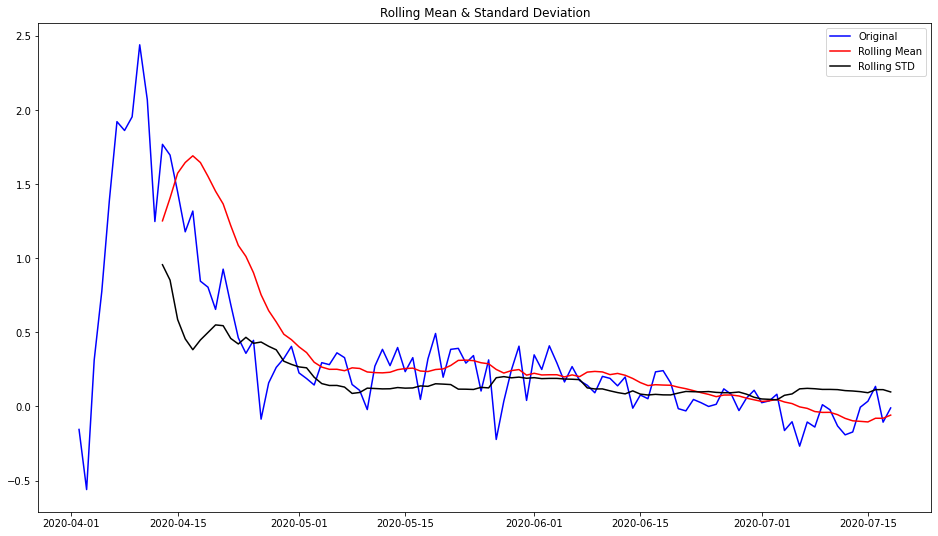

Result of Dickey_Fuller Test: 
Test Statistic         -5.921189e+00
p-value                 2.504237e-07
#Lags Uses              8.000000e+00
Number Of Ob            9.900000e+01
Critical Value (1%)    -3.498198e+00
Critical Value (5%)    -2.891208e+00
Critical Value (10%)   -2.582596e+00
dtype: float64


In [ ]:
test_stationarity(datasetLogScaleMinusMovingAgv)

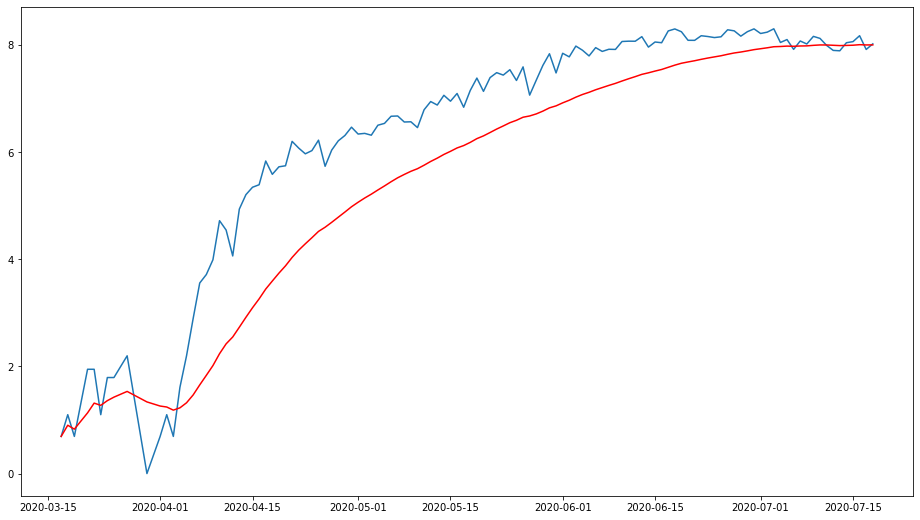

In [ ]:
exponentialDecayWeighteAvg = indexeDataset_logScale.ewm(halflife=12, min_periods=0, adjust=True).mean()
plt.plot(indexeDataset_logScale)
plt.plot(exponentialDecayWeighteAvg, color='red')

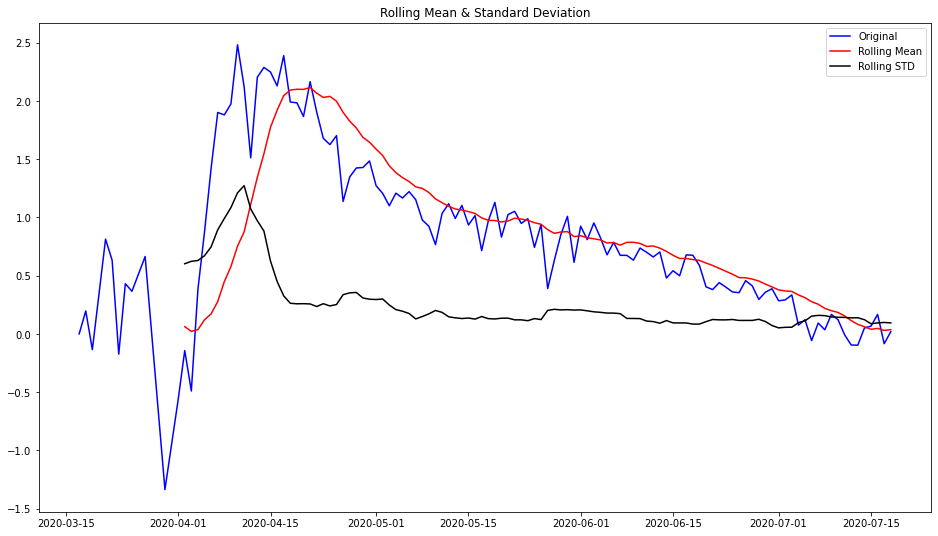

Result of Dickey_Fuller Test: 
Test Statistic           -2.234296
p-value                   0.194034
#Lags Uses               12.000000
Number Of Ob            106.000000
Critical Value (1%)      -3.493602
Critical Value (5%)      -2.889217
Critical Value (10%)     -2.581533
dtype: float64


In [ ]:
datasetLogScaleMinusMovingExpDecAvg = indexeDataset_logScale - exponentialDecayWeighteAvg
test_stationarity(datasetLogScaleMinusMovingExpDecAvg)

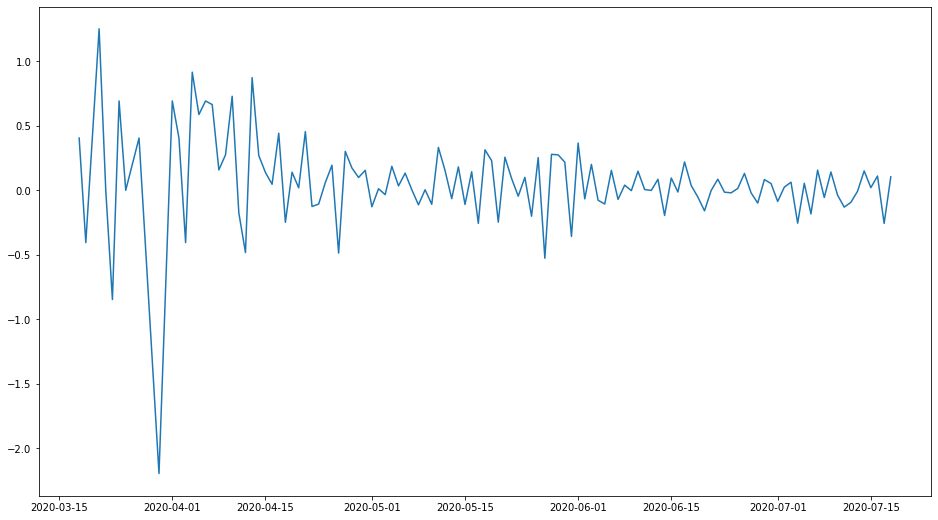

In [ ]:
datasetLogDiffShifting = indexeDataset_logScale - indexeDataset_logScale.shift()
plt.plot(datasetLogDiffShifting)

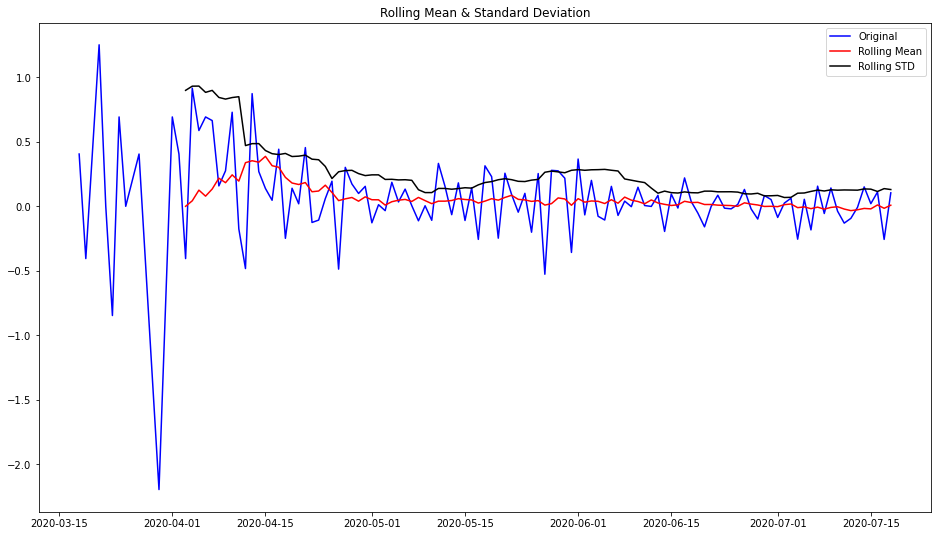

Result of Dickey_Fuller Test: 
Test Statistic           -1.931499
p-value                   0.317391
#Lags Uses               11.000000
Number Of Ob            106.000000
Critical Value (1%)      -3.493602
Critical Value (5%)      -2.889217
Critical Value (10%)     -2.581533
dtype: float64


In [ ]:
datasetLogDiffShifting.dropna(inplace=True)
test_stationarity(datasetLogDiffShifting)

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(indexeDataset_logScale)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(indexeDataset_logScale, label= 'Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label= 'Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label= 'Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label= 'Residuals')
plt.legend(loc='best')
plt.tight_layout()

decomposedLogData = residual
decomposedLogData.dropna(inplace=True)
test_stationarity(decomposedLogData)

ValueError: ignored

In [ ]:
decomposedLogData = residual
decomposedLogData.dropna(inplace=True)
test_stationarity(decomposedLogData)

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Partial Autocorrelation Function')

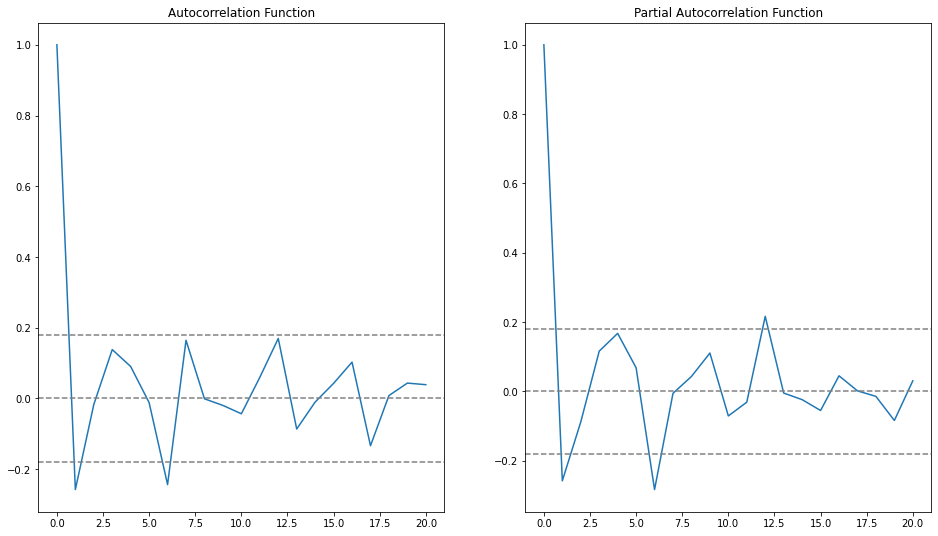

In [ ]:
from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf(datasetLogDiffShifting, nlags=20)
lag_pacf = pacf(datasetLogDiffShifting, nlags=20, method='ols')

#Plot ACF:
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifting)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifting)), linestyle='--', color='gray')
plt.title('Autocorrelation Function')

#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifting)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifting)), linestyle='--', color='gray')
plt.title('Partial Autocorrelation Function')


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Plotting AR Model


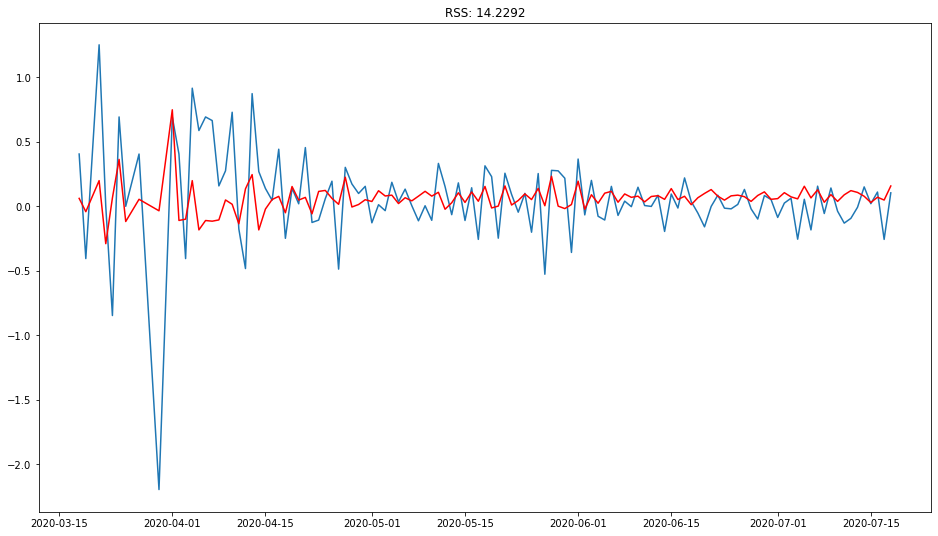

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

#AR Model 

model =  ARIMA(indexeDataset_logScale, order=(0,1,2))
results_AR = model.fit(disp = -1)
plt.plot(datasetLogDiffShifting)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues - datasetLogDiffShifting['new_cases'])**2))
print('Plotting AR Model')

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Plotting MA Model


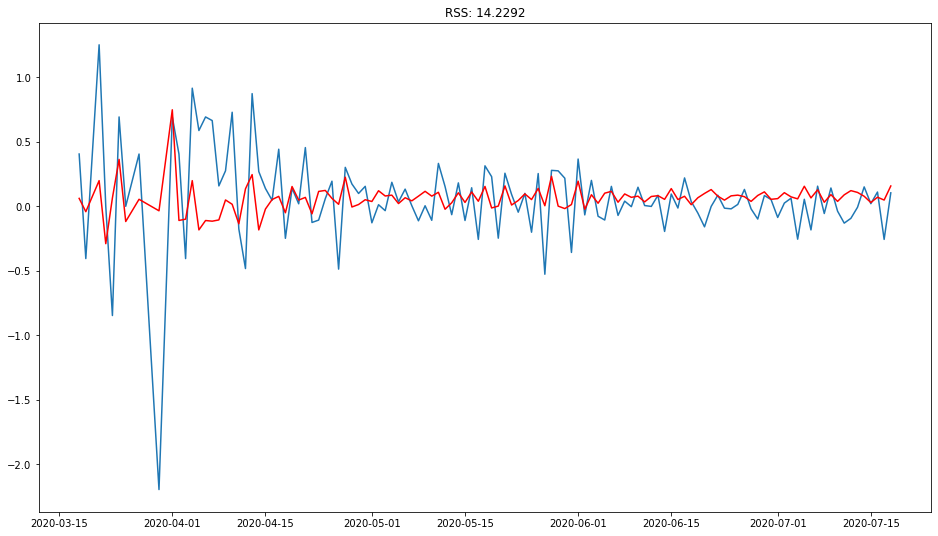

In [ ]:
#MA Model 

model =  ARIMA(indexeDataset_logScale, order=(0,1,2))
results_MA = model.fit(disp=-1)
plt.plot(datasetLogDiffShifting)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues - datasetLogDiffShifting['new_cases'])**2))
print('Plotting MA Model')

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Plotting ARIMA Model


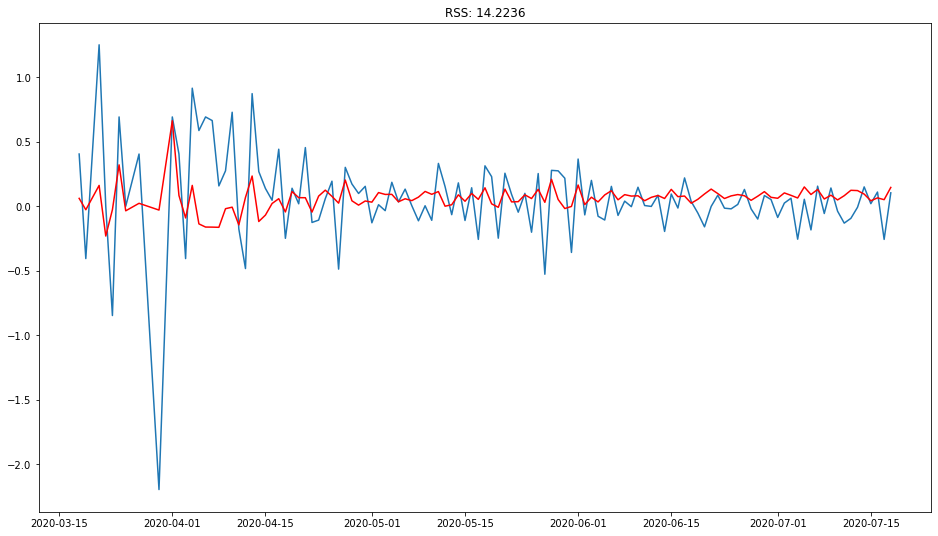

In [ ]:
#ARIMA Model 

model =  ARIMA(indexeDataset_logScale, order=(2,1,0 ))
results_ARIMA = model.fit(disp=-1)
plt.plot(datasetLogDiffShifting)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues - datasetLogDiffShifting['new_cases'])**2))
print('Plotting ARIMA Model')

In [ ]:
predistions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print(predistions_ARIMA_diff.head())

date
2020-03-18    0.061619
2020-03-19   -0.026829
2020-03-21    0.162047
2020-03-22   -0.230617
2020-03-23   -0.026148
dtype: float64


In [ ]:
#convert to Cumulative sum

predistions_ARIMA_diff_cumsum = predistions_ARIMA_diff.cumsum()
print(predistions_ARIMA_diff_cumsum.head())


date
2020-03-18    0.061619
2020-03-19    0.034790
2020-03-21    0.196837
2020-03-22   -0.033780
2020-03-23   -0.059928
dtype: float64


In [ ]:
predistions_ARIMA_log = pd.Series(indexeDataset_logScale['new_cases'], index=indexeDataset_logScale.index)
predistions_ARIMA_log = predistions_ARIMA_log.add(predistions_ARIMA_diff_cumsum, fill_value = 0)
predistions_ARIMA_log.head()

date
2020-03-17    0.693147
2020-03-18    1.160231
2020-03-19    0.727937
2020-03-21    2.142747
2020-03-22    1.912130
dtype: float64

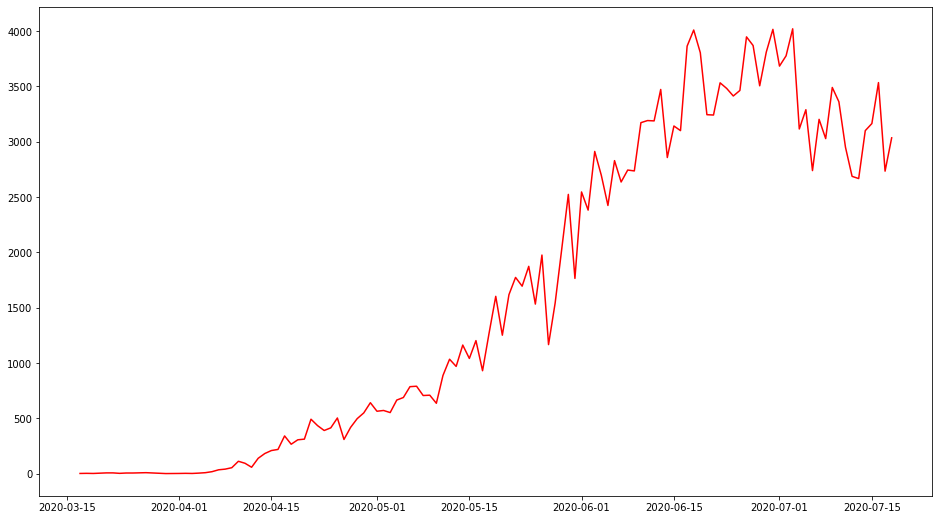

In [ ]:

plt.plot(indexeDataset, color='red')


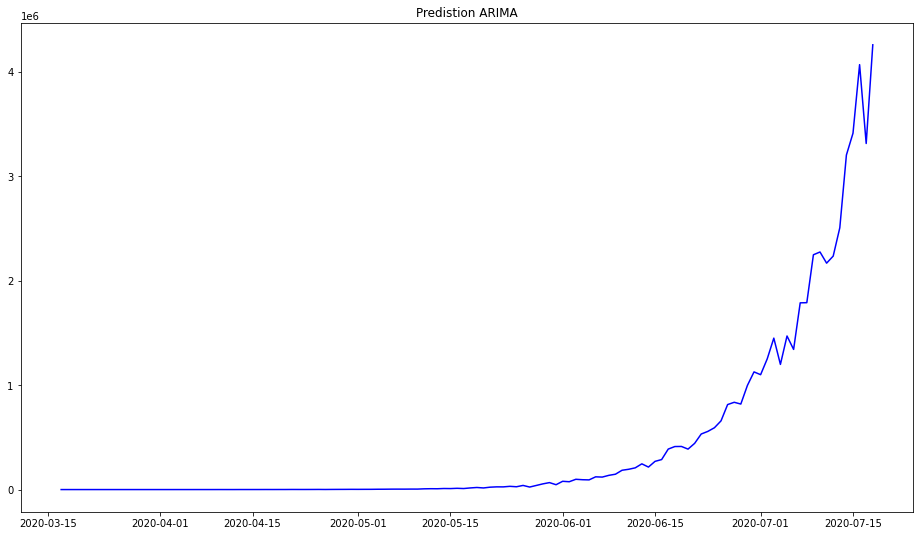

In [ ]:
predistions_ARIMA = np.exp(predistions_ARIMA_log)
plt.title('Predistion ARIMA')
plt.plot(predistions_ARIMA, color='blue')


In [ ]:
indexeDataset_logScale


,new_cases
date,
2020-03-17,0.693147
2020-03-18,1.098612
2020-03-19,0.693147
2020-03-21,1.945910
2020-03-22,1.945910
...,...
2020-07-14,8.038835
2020-07-15,8.059276
2020-07-16,8.169903


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


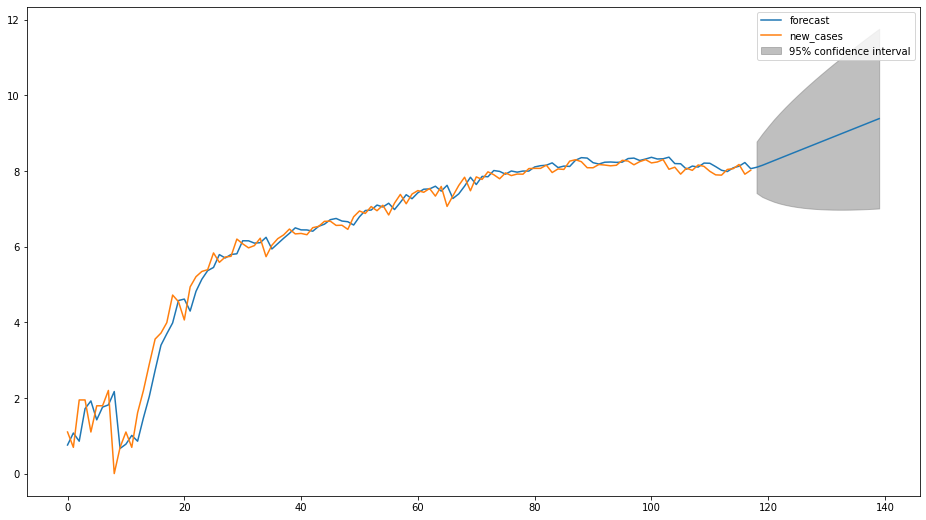

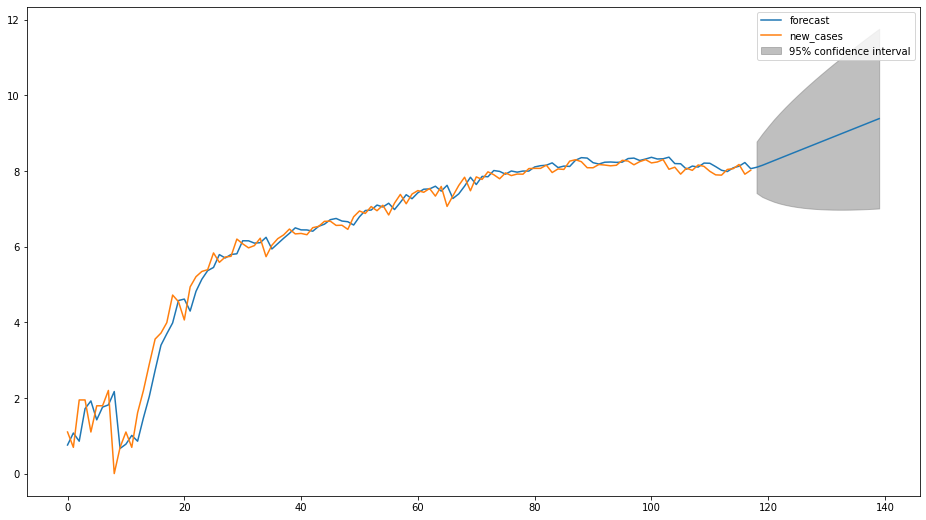

In [ ]:
results_ARIMA.plot_predict(1,140)

In [ ]:
results_ARIMA.forecast(steps=30)